<a href="https://colab.research.google.com/github/rushikeshnaik779/HiggsBoson/blob/main/HiggsBoson_regression_(no_dL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  


Saving kaggle (1).json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 65 bytes


In [2]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c higgs-boson
import zipfile 
# 
zip_ref = zipfile.ZipFile("training.zip", "r")
zip_ref.extractall()
zip_ref.close()
zip_ref = zipfile.ZipFile("test.zip", "r")
zip_ref.extractall()
zip_ref.close()

  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 5.44MB/s]
 95% 33.0M/34.8M [00:00<00:00, 17.8MB/s]
100% 34.8M/34.8M [00:00<00:00, 39.8MB/s]
 53% 9.00M/16.9M [00:00<00:00, 11.9MB/s]
100% 16.9M/16.9M [00:00<00:00, 19.3MB/s]
  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 84.0MB/s]


In [3]:
import pandas as pd 

training = pd.read_csv("training.csv")

In [4]:
training.sample(3)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
82623,182623,118.913,16.748,43.876,388.705,0.430,89.528,0.365,0.779,19.561,532.070,1.308,1.201,0.000,49.908,0.932,0.595,65.279,1.311,1.275,281.110,1.152,622.331,3,214.809,0.427,-2.125,170.948,0.856,-2.039,416.882,0.002653,s
89115,189115,145.150,5.287,113.455,26.653,-999.000,-999.000,-999.000,2.710,26.653,115.840,1.067,-0.349,-999.000,56.038,-2.352,-1.248,59.802,-2.183,2.331,6.224,2.056,169.206,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.018636,s
65172,165172,127.376,38.263,57.704,244.463,4.125,925.418,-3.554,1.076,3.073,374.223,0.309,1.362,0.784,99.191,0.300,-0.285,30.686,-0.181,-1.248,125.532,-0.622,400.338,2,147.989,-1.226,2.702,96.356,2.899,2.409,244.346,0.001503,s


In [5]:
# let's drop not neccesarry columns 
training.drop(['EventId', 'Label'], axis=1, inplace=True)

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [8]:
# checking if the dataset has null values 
training.isna().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

In [13]:
# let's build a base-line model without doing any feature engineering or feature selection 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# dividing the dataset as train test split
X, y = training.drop('Weight', axis=1), training['Weight']
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
print(r2_score( y_test, y_pred))

0.46585064144691046


In [19]:
# let's rescale the features 
#defining a normalisation function 
#hint use formula=(x-min(x))/(max(x) - min(x))
def normalize(x): 
    x = (x - x.min())/(x.max() - x.min())
    return x
    
                                            
                                              
# applying normalize ( ) to all columns using apply function 
X = X.apply(normalize)

In [22]:
X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.519149,0.074854,0.068128,0.009869,0.992464,0.188101,0.986193,0.521549,0.014789,0.083957,0.077816,0.993635,0.9992,0.016977,0.703763,0.560630,0.047964,0.954073,0.115850,0.005880,0.455920,0.123125,0.666667,0.503137,0.997659,0.997309,0.607433,0.996751,0.994395,0.069484
1,0.529404,0.099653,0.072155,0.016983,0.000000,0.000000,0.000000,0.596238,0.000733,0.043764,0.042178,1.000000,0.0000,0.029572,0.908327,0.020847,0.020435,0.600240,0.516391,0.015689,0.195099,0.075802,0.333333,0.493130,0.996239,0.998021,0.000000,0.000000,0.000000,0.028300
2,0.000000,0.235006,0.089071,0.012570,0.000000,0.000000,0.000000,0.536888,0.003293,0.083987,0.189040,1.000000,0.0000,0.016327,0.359087,0.166932,0.178578,0.309904,0.667409,0.019059,0.152132,0.123969,0.333333,0.492199,0.997563,0.994842,0.000000,0.000000,0.000000,0.027091
3,0.521630,0.117983,0.055557,0.000146,0.000000,0.000000,0.000000,0.566472,0.000146,0.016533,0.116952,0.045615,0.0000,0.003556,0.168935,0.501591,0.051137,0.395966,0.006684,0.010896,0.509548,0.036368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
4,0.536216,0.024512,0.095662,0.005787,0.000000,0.000000,0.000000,0.672571,0.005787,0.006576,0.051151,0.010255,0.0000,0.011028,0.060448,0.144971,0.007064,0.659545,0.749682,0.000920,0.361394,0.019823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(r2_score( y_test, y_pred))

0.4669235095610891


## Let's check the multi-collinearity 

In [23]:
# Importing matplotlib and seaborn 
import matplotlib.pyplot as plt 
import seaborn as sns

# write magic function matplotlib inline
%matplotlib inline

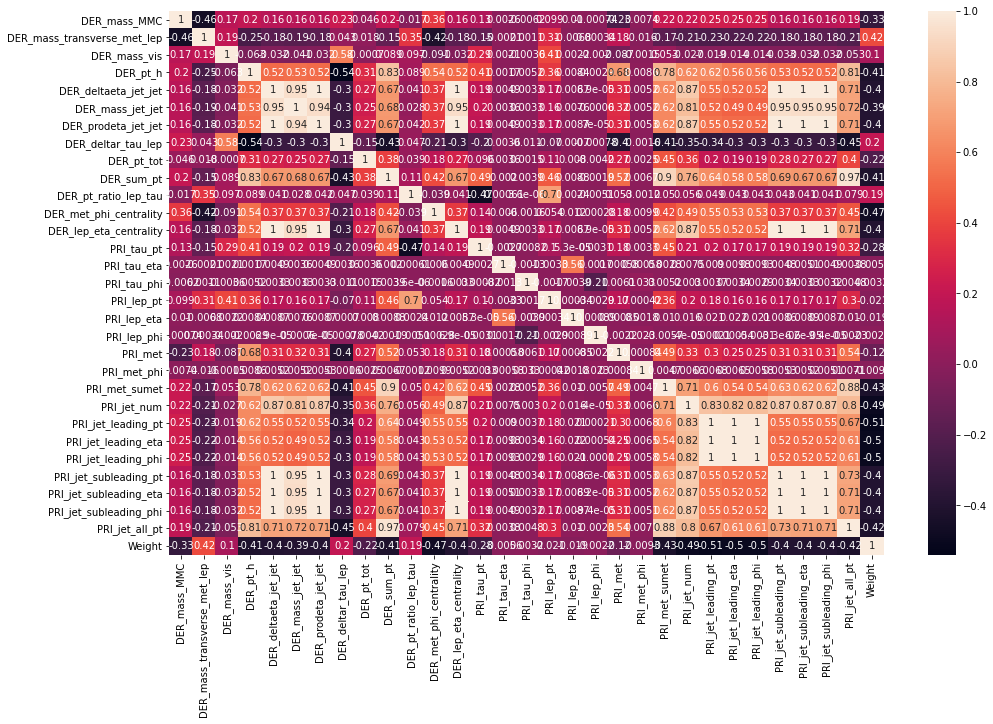

In [24]:
# Let's see the correlation matrix on hoousing data
# Size of the figure=(16,10)
plt.subplots(1, 1, figsize=(16, 10))

sns.heatmap(training.corr(), annot=True)

plt.show()


In [26]:
# import variance_inflation_factor module
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Define vif_scores function as stated above
def vif_scores(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
  
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

    return vif_data



# print vif scores for all current input features
vif_df = vif_scores(X_train)
vif_df


,feature,VIF
0,DER_mass_MMC,1.241659e+01
1,DER_mass_transverse_met_lep,7.530157e+00
2,DER_mass_vis,1.528042e+01
3,DER_pt_h,2.129601e+01
4,DER_deltaeta_jet_jet,1.958522e+06
5,DER_mass_jet_jet,5.593610e+01
6,DER_prodeta_jet_jet,2.335697e+05
7,DER_deltar_tau_lep,3.399443e+01
8,DER_pt_tot,2.785522e+00
9,DER_sum_pt,1.371141e+08


In [27]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop(['PRI_jet_all_pt'], axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature           VIF
0                  DER_mass_MMC  1.174252e+01
1   DER_mass_transverse_met_lep  7.045472e+00
2                  DER_mass_vis  1.479652e+01
3                      DER_pt_h  2.129169e+01
4          DER_deltaeta_jet_jet  1.958462e+06
5              DER_mass_jet_jet  5.593398e+01
6           DER_prodeta_jet_jet  2.335640e+05
7            DER_deltar_tau_lep  2.930698e+01
8                    DER_pt_tot  2.784320e+00
9                    DER_sum_pt  2.052813e+02
10         DER_pt_ratio_lep_tau  1.795354e+01
11       DER_met_phi_centrality  4.156086e+00
12       DER_lep_eta_centrality  3.228583e+06
13                   PRI_tau_pt  1.154579e+01
14                  PRI_tau_eta  7.378005e+00
15                  PRI_tau_phi  3.876121e+00
16                   PRI_lep_pt  1.640348e+01
17                  PRI_lep_eta  6.966503e+00
18                  PRI_lep_phi  4.020590e+00
19                      PRI_met  1.018364e+01
20                  PRI_met_phi  3

In [28]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('PRI_jet_subleading_phi', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature           VIF
0                  DER_mass_MMC  1.174024e+01
1   DER_mass_transverse_met_lep  7.042957e+00
2                  DER_mass_vis  1.479510e+01
3                      DER_pt_h  2.129150e+01
4          DER_deltaeta_jet_jet  1.957434e+06
5              DER_mass_jet_jet  5.592763e+01
6           DER_prodeta_jet_jet  2.318944e+05
7            DER_deltar_tau_lep  2.928846e+01
8                    DER_pt_tot  2.784300e+00
9                    DER_sum_pt  2.052678e+02
10         DER_pt_ratio_lep_tau  1.794527e+01
11       DER_met_phi_centrality  4.156065e+00
12       DER_lep_eta_centrality  3.018491e+06
13                   PRI_tau_pt  1.154178e+01
14                  PRI_tau_eta  7.377820e+00
15                  PRI_tau_phi  3.860759e+00
16                   PRI_lep_pt  1.640266e+01
17                  PRI_lep_eta  6.966429e+00
18                  PRI_lep_phi  3.993493e+00
19                      PRI_met  1.018287e+01
20                  PRI_met_phi  3

In [29]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('DER_deltaeta_jet_jet', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature            VIF
0                  DER_mass_MMC      11.740195
1   DER_mass_transverse_met_lep       7.042187
2                  DER_mass_vis      14.794857
3                      DER_pt_h      21.289614
4              DER_mass_jet_jet      38.043704
5           DER_prodeta_jet_jet  186663.514129
6            DER_deltar_tau_lep      29.288228
7                    DER_pt_tot       2.783072
8                    DER_sum_pt     205.252440
9          DER_pt_ratio_lep_tau      17.944395
10       DER_met_phi_centrality       4.155355
11       DER_lep_eta_centrality  400015.441327
12                   PRI_tau_pt      11.541753
13                  PRI_tau_eta       7.377794
14                  PRI_tau_phi       3.860743
15                   PRI_lep_pt      16.398852
16                  PRI_lep_eta       6.966227
17                  PRI_lep_phi       3.993445
18                      PRI_met      10.182586
19                  PRI_met_phi       3.876754
20           

In [30]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('PRI_jet_subleading_eta', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature            VIF
0                  DER_mass_MMC      11.739271
1   DER_mass_transverse_met_lep       7.040602
2                  DER_mass_vis      14.790510
3                      DER_pt_h      21.288977
4              DER_mass_jet_jet      38.041074
5           DER_prodeta_jet_jet  185793.412007
6            DER_deltar_tau_lep      29.270297
7                    DER_pt_tot       2.782962
8                    DER_sum_pt     205.227753
9          DER_pt_ratio_lep_tau      17.941803
10       DER_met_phi_centrality       4.155180
11       DER_lep_eta_centrality  186251.842660
12                   PRI_tau_pt      11.541504
13                  PRI_tau_eta       7.365117
14                  PRI_tau_phi       3.860677
15                   PRI_lep_pt      16.395994
16                  PRI_lep_eta       6.948771
17                  PRI_lep_phi       3.993305
18                      PRI_met      10.182485
19                  PRI_met_phi       3.876697
20           

In [31]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('PRI_jet_leading_phi', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature            VIF
0                  DER_mass_MMC      11.723094
1   DER_mass_transverse_met_lep       7.029167
2                  DER_mass_vis      14.778013
3                      DER_pt_h      21.280138
4              DER_mass_jet_jet      38.038033
5           DER_prodeta_jet_jet  185775.444877
6            DER_deltar_tau_lep      29.145964
7                    DER_pt_tot       2.780728
8                    DER_sum_pt     203.199265
9          DER_pt_ratio_lep_tau      17.887444
10       DER_met_phi_centrality       4.154524
11       DER_lep_eta_centrality  186251.103850
12                   PRI_tau_pt      11.390928
13                  PRI_tau_eta       7.357834
14                  PRI_tau_phi       3.823855
15                   PRI_lep_pt      16.376927
16                  PRI_lep_eta       6.927835
17                  PRI_lep_phi       3.905847
18                      PRI_met      10.176834
19                  PRI_met_phi       3.814658
20           

In [32]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('DER_lep_eta_centrality', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature          VIF
0                  DER_mass_MMC    11.722900
1   DER_mass_transverse_met_lep     7.025908
2                  DER_mass_vis    14.777586
3                      DER_pt_h    21.262829
4              DER_mass_jet_jet    15.440230
5           DER_prodeta_jet_jet  5093.769652
6            DER_deltar_tau_lep    29.145894
7                    DER_pt_tot     2.780625
8                    DER_sum_pt   200.961634
9          DER_pt_ratio_lep_tau    17.887350
10       DER_met_phi_centrality     4.153114
11                   PRI_tau_pt    11.305091
12                  PRI_tau_eta     7.357792
13                  PRI_tau_phi     3.823854
14                   PRI_lep_pt    16.285738
15                  PRI_lep_eta     6.927835
16                  PRI_lep_phi     3.905836
17                      PRI_met    10.176834
18                  PRI_met_phi     3.814653
19                PRI_met_sumet    20.442695
20                  PRI_jet_num    76.682214
21        

In [33]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('PRI_jet_leading_pt', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature          VIF
0                  DER_mass_MMC    11.722879
1   DER_mass_transverse_met_lep     7.025891
2                  DER_mass_vis    14.773769
3                      DER_pt_h    20.326552
4              DER_mass_jet_jet    14.794373
5           DER_prodeta_jet_jet  2741.914591
6            DER_deltar_tau_lep    29.141266
7                    DER_pt_tot     2.546798
8                    DER_sum_pt    40.435271
9          DER_pt_ratio_lep_tau    17.886542
10       DER_met_phi_centrality     4.152780
11                   PRI_tau_pt     6.147876
12                  PRI_tau_eta     7.357343
13                  PRI_tau_phi     3.823838
14                   PRI_lep_pt    10.801177
15                  PRI_lep_eta     6.925734
16                  PRI_lep_phi     3.905836
17                      PRI_met    10.167376
18                  PRI_met_phi     3.814650
19                PRI_met_sumet    20.424523
20                  PRI_jet_num    47.296495
21        

In [34]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('PRI_jet_subleading_pt', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature        VIF
0                  DER_mass_MMC  11.722872
1   DER_mass_transverse_met_lep   7.022308
2                  DER_mass_vis  14.772549
3                      DER_pt_h  19.230621
4              DER_mass_jet_jet  13.909421
5           DER_prodeta_jet_jet  25.633044
6            DER_deltar_tau_lep  29.139564
7                    DER_pt_tot   2.539313
8                    DER_sum_pt  23.789133
9          DER_pt_ratio_lep_tau  17.886306
10       DER_met_phi_centrality   4.149992
11                   PRI_tau_pt   5.497103
12                  PRI_tau_eta   7.357338
13                  PRI_tau_phi   3.823751
14                   PRI_lep_pt  10.112972
15                  PRI_lep_eta   6.925724
16                  PRI_lep_phi   3.905790
17                      PRI_met  10.164374
18                  PRI_met_phi   3.814610
19                PRI_met_sumet  20.403013
20                  PRI_jet_num  46.391899
21          PRI_jet_leading_eta  17.420500


In [35]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('PRI_jet_num', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature        VIF
0                  DER_mass_MMC  11.722255
1   DER_mass_transverse_met_lep   7.022241
2                  DER_mass_vis  14.759547
3                      DER_pt_h  18.912893
4              DER_mass_jet_jet  13.563180
5           DER_prodeta_jet_jet  13.911869
6            DER_deltar_tau_lep  29.112941
7                    DER_pt_tot   2.269440
8                    DER_sum_pt  20.557647
9          DER_pt_ratio_lep_tau  17.882571
10       DER_met_phi_centrality   4.149897
11                   PRI_tau_pt   5.383396
12                  PRI_tau_eta   7.357334
13                  PRI_tau_phi   3.823745
14                   PRI_lep_pt   9.963251
15                  PRI_lep_eta   6.925723
16                  PRI_lep_phi   3.905756
17                      PRI_met  10.159687
18                  PRI_met_phi   3.814575
19                PRI_met_sumet  20.375037
20          PRI_jet_leading_eta   5.019639


In [36]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('DER_deltar_tau_lep', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature        VIF
0                  DER_mass_MMC   8.713313
1   DER_mass_transverse_met_lep   6.938964
2                  DER_mass_vis   7.210793
3                      DER_pt_h  16.147015
4              DER_mass_jet_jet  13.554194
5           DER_prodeta_jet_jet  13.887713
6                    DER_pt_tot   2.268266
7                    DER_sum_pt  20.525139
8          DER_pt_ratio_lep_tau  15.039393
9        DER_met_phi_centrality   4.068589
10                   PRI_tau_pt   5.368338
11                  PRI_tau_eta   7.324525
12                  PRI_tau_phi   3.779281
13                   PRI_lep_pt   8.551721
14                  PRI_lep_eta   6.907419
15                  PRI_lep_phi   3.850974
16                      PRI_met   9.318842
17                  PRI_met_phi   3.781416
18                PRI_met_sumet  20.329934
19          PRI_jet_leading_eta   4.987338


In [37]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('DER_sum_pt', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature        VIF
0                  DER_mass_MMC   8.585527
1   DER_mass_transverse_met_lep   6.867643
2                  DER_mass_vis   7.179235
3                      DER_pt_h  15.204630
4              DER_mass_jet_jet  13.138961
5           DER_prodeta_jet_jet  13.874096
6                    DER_pt_tot   2.262029
7          DER_pt_ratio_lep_tau  14.972188
8        DER_met_phi_centrality   4.017879
9                    PRI_tau_pt   5.178738
10                  PRI_tau_eta   7.319229
11                  PRI_tau_phi   3.768862
12                   PRI_lep_pt   7.621806
13                  PRI_lep_eta   6.903482
14                  PRI_lep_phi   3.842470
15                      PRI_met   9.317233
16                  PRI_met_phi   3.776470
17                PRI_met_sumet  13.127784
18          PRI_jet_leading_eta   4.845729


In [38]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('DER_pt_ratio_lep_tau', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature        VIF
0                  DER_mass_MMC   8.035554
1   DER_mass_transverse_met_lep   6.206170
2                  DER_mass_vis   7.178363
3                      DER_pt_h  15.099346
4              DER_mass_jet_jet  13.137730
5           DER_prodeta_jet_jet  13.873877
6                    DER_pt_tot   2.260293
7        DER_met_phi_centrality   4.016803
8                    PRI_tau_pt   2.949861
9                   PRI_tau_eta   7.255200
10                  PRI_tau_phi   3.651989
11                   PRI_lep_pt   4.446399
12                  PRI_lep_eta   6.859600
13                  PRI_lep_phi   3.726497
14                      PRI_met   9.311219
15                  PRI_met_phi   3.707099
16                PRI_met_sumet  13.063085
17          PRI_jet_leading_eta   4.844829


In [39]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('DER_pt_h', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature        VIF
0                  DER_mass_MMC   7.972714
1   DER_mass_transverse_met_lep   4.522247
2                  DER_mass_vis   6.303590
3              DER_mass_jet_jet  13.130982
4           DER_prodeta_jet_jet  13.871805
5                    DER_pt_tot   2.260162
6        DER_met_phi_centrality   3.755081
7                    PRI_tau_pt   2.588297
8                   PRI_tau_eta   7.250373
9                   PRI_tau_phi   3.644882
10                   PRI_lep_pt   3.039969
11                  PRI_lep_eta   6.856497
12                  PRI_lep_phi   3.716621
13                      PRI_met   4.213168
14                  PRI_met_phi   3.702433
15                PRI_met_sumet  12.043421
16          PRI_jet_leading_eta   4.563097


In [40]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('DER_mass_jet_jet', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature        VIF
0                  DER_mass_MMC   7.972664
1   DER_mass_transverse_met_lep   4.504810
2                  DER_mass_vis   6.298943
3           DER_prodeta_jet_jet   2.518173
4                    DER_pt_tot   2.246496
5        DER_met_phi_centrality   3.750894
6                    PRI_tau_pt   2.586648
7                   PRI_tau_eta   7.250313
8                   PRI_tau_phi   3.644872
9                    PRI_lep_pt   3.039328
10                  PRI_lep_eta   6.856495
11                  PRI_lep_phi   3.716578
12                      PRI_met   4.193202
13                  PRI_met_phi   3.702425
14                PRI_met_sumet  11.966327
15          PRI_jet_leading_eta   4.544103


In [41]:
# Lets check vif scores again after removing bbratio from features.
X_train.drop('PRI_met_sumet', axis=1, inplace=True)

# print vif scores for all current input features
vif_df = vif_scores(X_train)
print(vif_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                        feature       VIF
0                  DER_mass_MMC  7.659636
1   DER_mass_transverse_met_lep  4.447364
2                  DER_mass_vis  6.205153
3           DER_prodeta_jet_jet  2.167734
4                    DER_pt_tot  1.954292
5        DER_met_phi_centrality  3.743058
6                    PRI_tau_pt  2.116396
7                   PRI_tau_eta  7.247203
8                   PRI_tau_phi  3.637333
9                    PRI_lep_pt  2.649497
10                  PRI_lep_eta  6.853624
11                  PRI_lep_phi  3.712161
12                      PRI_met  3.614831
13                  PRI_met_phi  3.699711
14          PRI_jet_leading_eta  4.320357


In [42]:
X = X[vif_df.feature.values]
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [43]:
print(f'Shape of the X {X_train.shape}')

Shape of the X (200000, 15)


In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(r2_score( y_test, y_pred))

0.4359160881842741


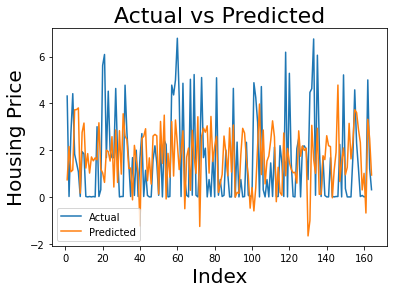

In [45]:
# Actual vs Predicted graph as below
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c, y_train[:164])
plt.plot(c, y_pred[:164])
plt.title('Actual vs Predicted', size=22)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Index', size=20)
plt.ylabel('Housing Price', size=20)
plt.show()
#Plotting predicted
# Plot heading 
# X-label
# Y-label
#showing the plot

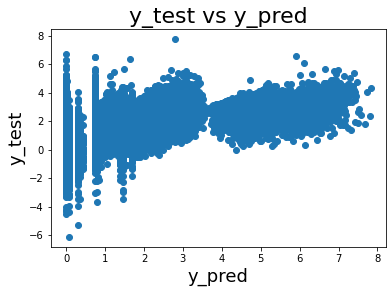

In [47]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()
#plotting scatter plot between actual and predicted
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred)
plt.title("y_test vs y_pred", size=22)
plt.xlabel('y_pred', size=18)
plt.ylabel('y_test', size=18)
plt.show()

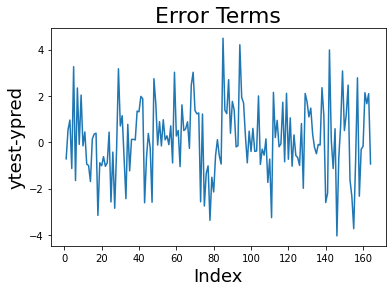

In [48]:
# Plotting line chart of Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c, (y_test-y_pred)[:164])
plt.title('Error Terms', size=22)
plt.ylabel('ytest-ypred', size=18)
plt.xlabel('Index', size=18)
plt.show()
# line plot between c and error trem
# Plot heading 
# X-label
# Y-label
#show plot

In [50]:
#import metrics module
from sklearn.metrics  import mean_absolute_error, mean_squared_error
import numpy as np

#calculate and print RMSE
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MSE',mean_squared_error(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred))

RMSE 1.4115104832727028
MSE 1.9923618443887392
MAE 1.1139162775277658


# Feature Selection 

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
# Initializing linearRegression function 
lm = LinearRegression()

# Iitialising RFE using above model
rfe =RFE(lm,n_features_to_select=10 )        

# Fitting and running RFE with X_train and y_train
rfe = rfe.fit(X_train, y_train)

# Printing the boolean results for each features
print(rfe.support_) 

# Printing the ranks for each features
print(rfe.ranking_) 

[ True  True  True  True  True  True  True False False  True False False
  True False  True]
[1 1 1 1 1 1 1 3 4 1 2 5 1 6 1]


In [62]:
#Print the total no. of features in X

#Get columns which are supported by RFE
col=X_train.iloc[:, rfe.support_].columns

# print col
print(col)


Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_prodeta_jet_jet', 'DER_pt_tot', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met', 'PRI_jet_leading_eta'],
      dtype='object')


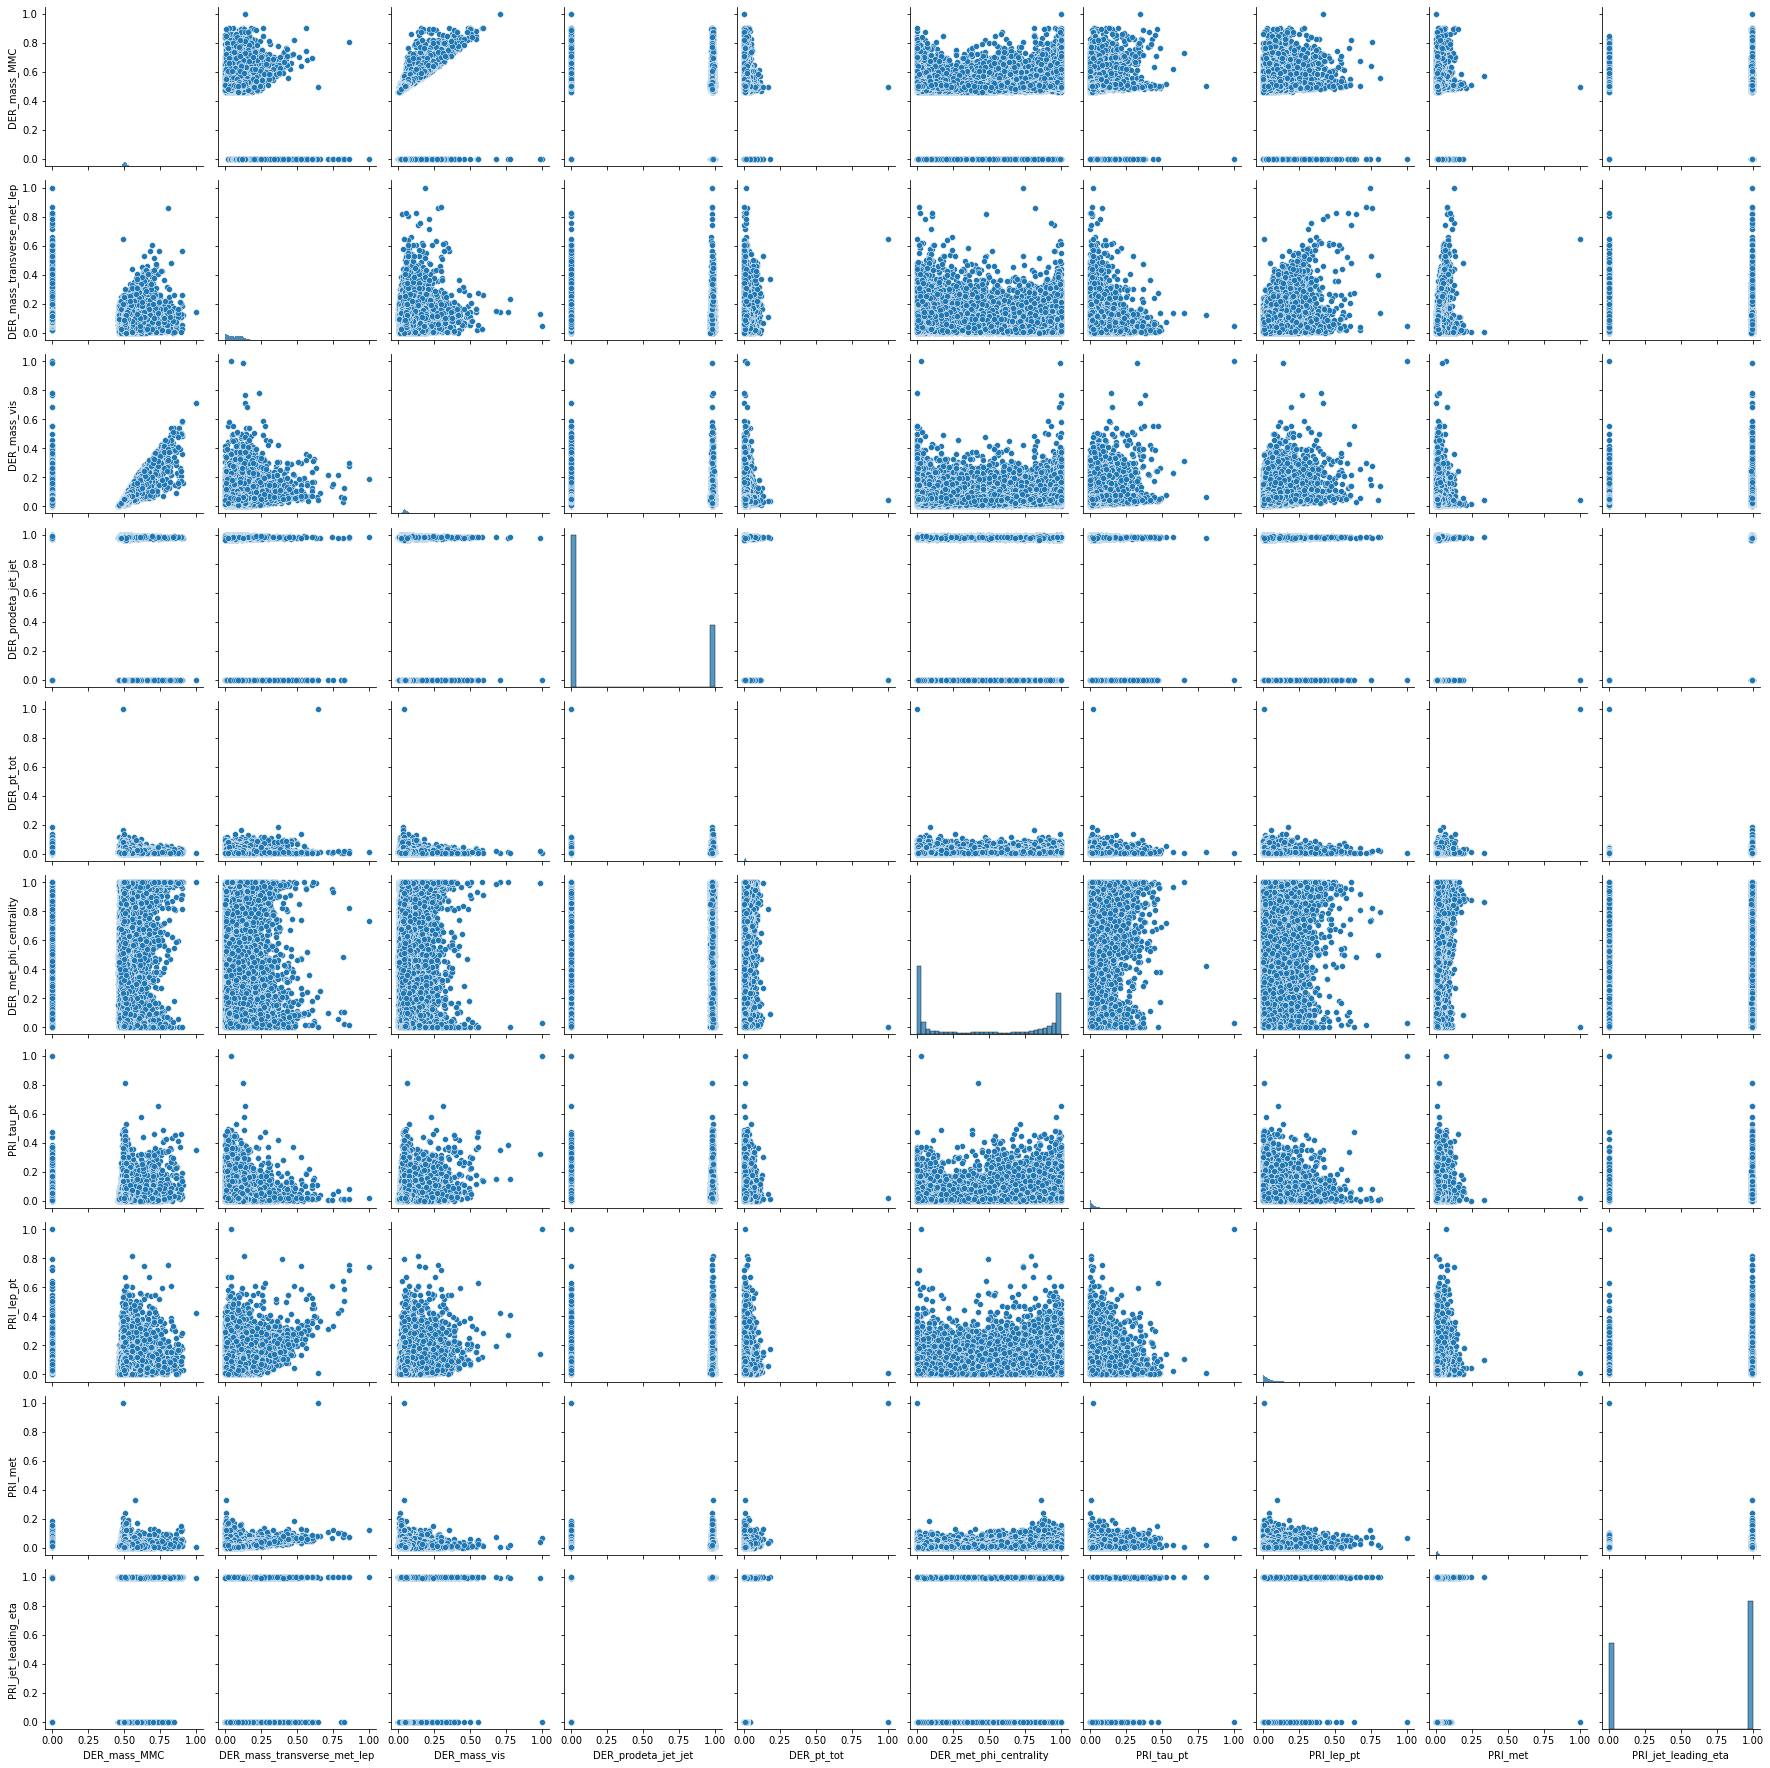

In [63]:
sns.pairplot(X_train[col])

In [64]:
# let's build the model 
X_train_rfe = X_train[col]

In [65]:
X_test_ref = X_test[col]

In [66]:
lr.fit(X_train_rfe, y_train)
y_pred = lr.predict(X_test_ref)

In [67]:
#calculate and print RMSE
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MSE',mean_squared_error(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred))

RMSE 1.4115974638072273
MSE 1.9926073998269966
MAE 1.113980491651606


In [68]:
r2_score(y_test, y_pred)

0.435846565736547

In [69]:
# let's use decision tree regression and see what will happen 
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)


In [70]:
#calculate and print RMSE
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MSE',mean_squared_error(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred))
print('RSquared', r2_score(y_test, y_pred))

RMSE 1.6441494539758164
MSE 2.703227427008975
MAE 0.976273440583882
RSquared 0.23114943712301705


In [71]:
from sklearn.ensemble import RandomForestRegressor

rr = RandomForestRegressor()
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)


In [72]:
#calculate and print RMSE
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MSE',mean_squared_error(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred))
print('RSquared', r2_score(y_test, y_pred))

RMSE 1.1569800264677623
MSE 1.3386027816453439
MAE 0.807264906202737
RSquared 0.6192752811495869


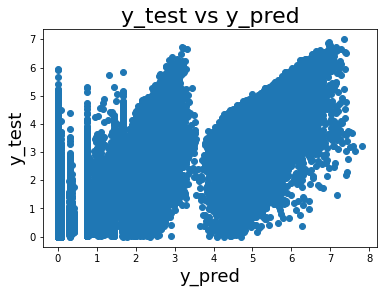

In [74]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()
#plotting scatter plot between actual and predicted
plt.scatter(y_test, y_pred)
plt.title("y_test vs y_pred", size=22)
plt.xlabel('y_pred', size=18)
plt.ylabel('y_test', size=18)
plt.show()

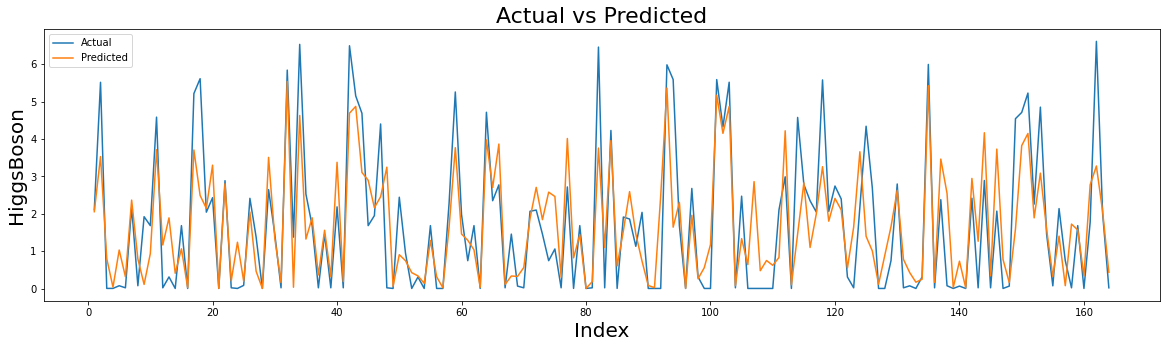

In [77]:
# Actual vs Predicted graph as below
c = [i for i in range(1,165,1)]
fig = plt.figure(figsize=(20, 5))
plt.plot(c, y_test[:164])
plt.plot(c, y_pred[:164])
plt.title('Actual vs Predicted', size=22)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Index', size=20)
plt.ylabel('HiggsBoson', size=20)
plt.show()